# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Loading the train file

In [2]:
train_df=pd.read_csv(r"C:\Users\jenan\Downloads\train_ctrUa4K.csv")

# Exploratory Data Analysis on train file

In [3]:
#To display the first 5 rows of the dataset
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#To find the number of rows and columns in the dataset
train_df.shape

(614, 13)

In [5]:
#To find the column names
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#To get informations such as number of columns,column names,number of non-null cells in each column,datatype of each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#To get statistical summary of numerical columns
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Visualization of the train dataset

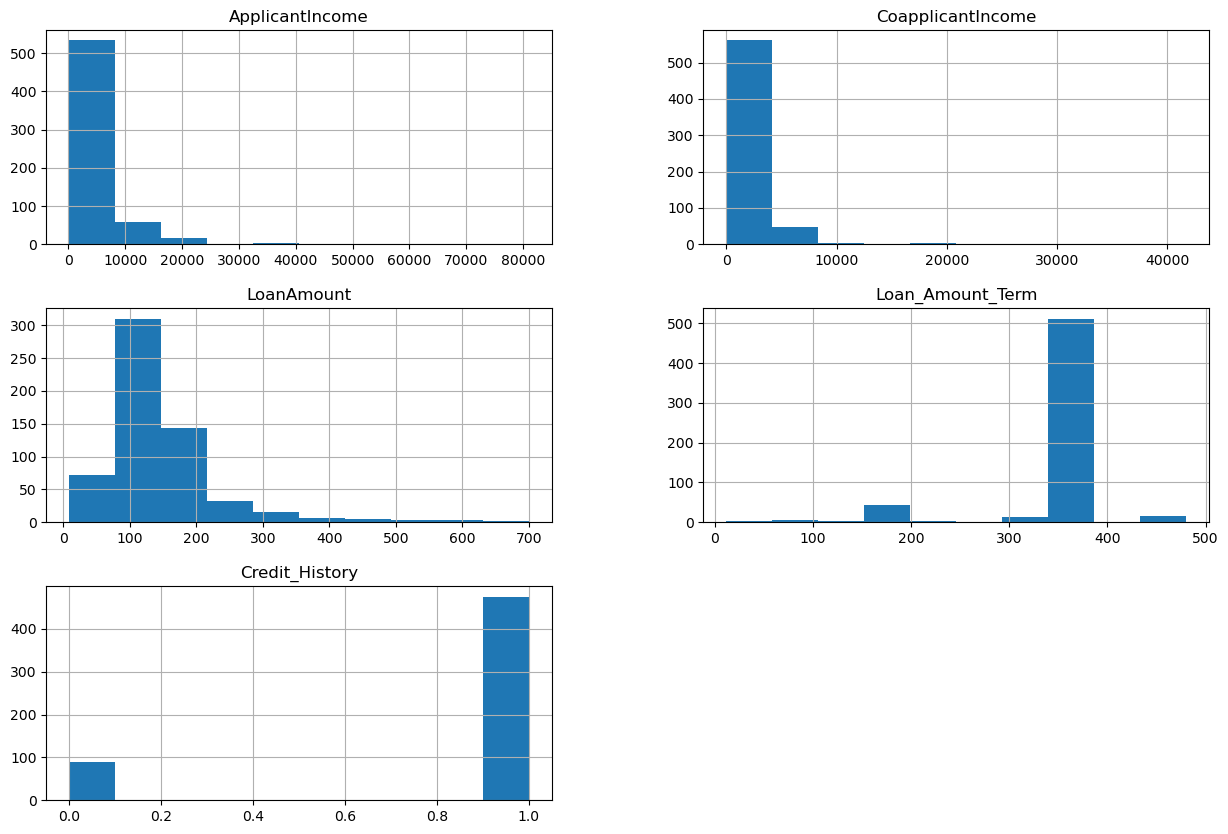

In [8]:
#Plotting histogram to analyse the distribution of numerical features
train_df.hist(figsize = (15,10))
plt.show()

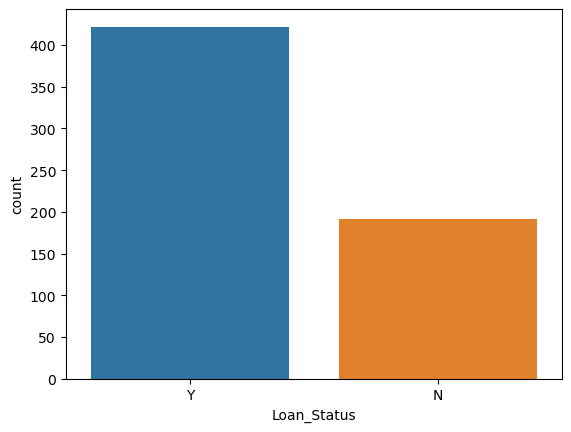

In [10]:
#Countplot to analyse the loan status
sns.countplot(x='Loan_Status',data=train_df)
plt.show()

We can see that a larger number of people got their loans approved.

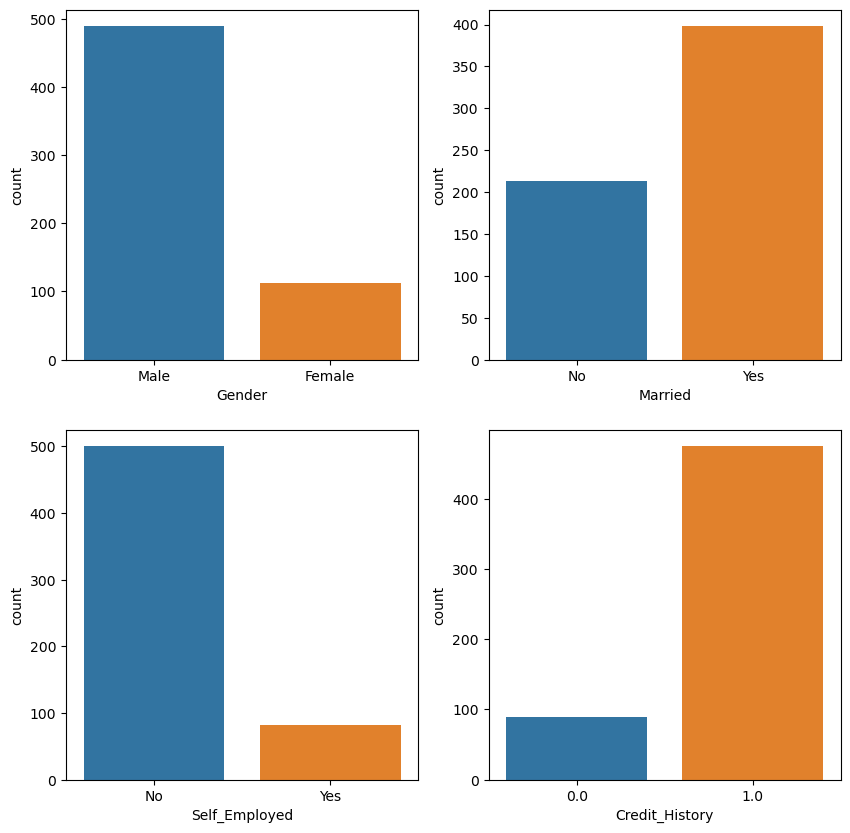

In [11]:
#Visualizing the categorical features
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.countplot(x='Gender',data=train_df)
plt.subplot(222)
sns.countplot(x='Married',data=train_df)
plt.subplot(223)
sns.countplot(x='Self_Employed',data=train_df)
plt.subplot(224)
sns.countplot(x='Credit_History',data=train_df)
plt.show()

We can see that a larger number of applicants are male and most of the applicants are married.Only a few applicants(less than 100) are self employed.A larger number of applicants have repaid their debts.

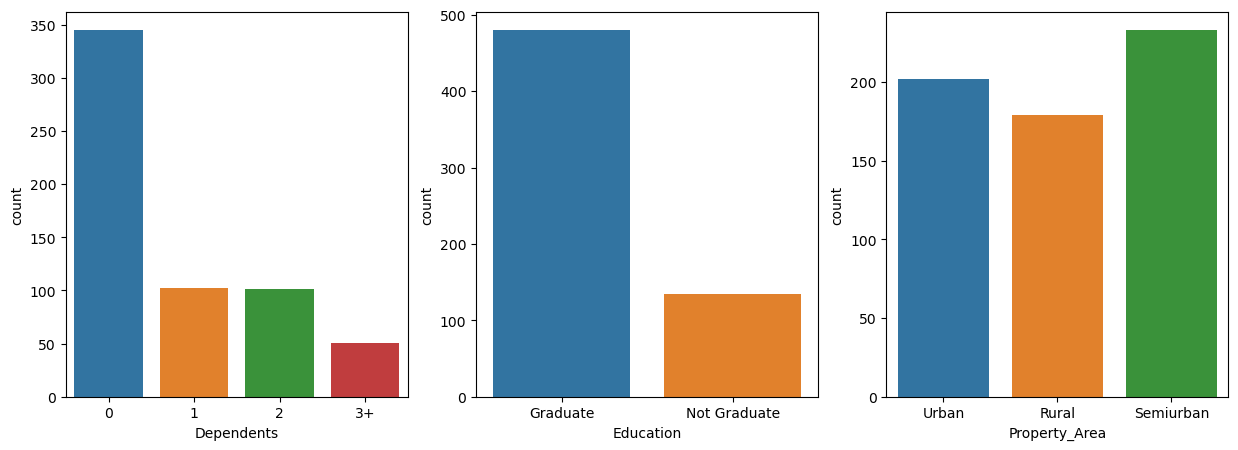

In [12]:
#Visualizing the ordinal variables
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(x='Dependents',data=train_df)
plt.subplot(132)
sns.countplot(x='Education',data=train_df)
plt.subplot(133)
sns.countplot(x='Property_Area',data=train_df)
plt.show()

Most of the applicants don't have dependents and a larger number of applicants are graduates.Also, most of the applicants are from semi urban areas.

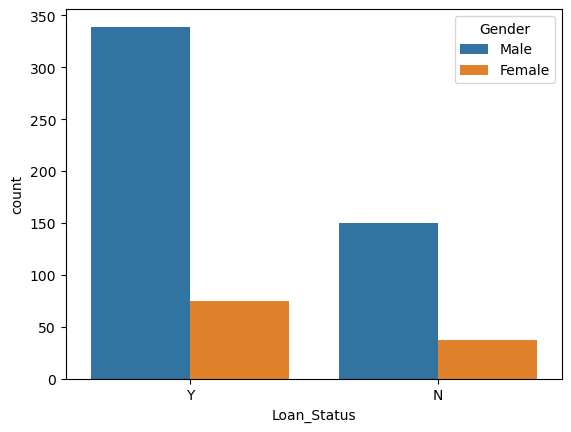

In [13]:
#Countplot to analyse the loan status based on gender
sns.countplot(x='Loan_Status',data=train_df,hue='Gender')
plt.show()

Most of the male and female applicants got their loans approved.

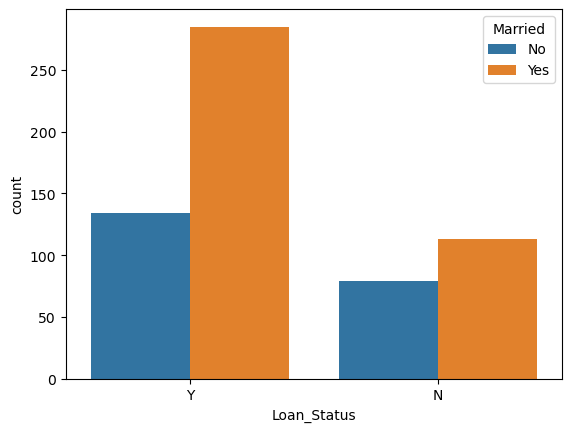

In [14]:
sns.countplot(x='Loan_Status',data=train_df,hue='Married')
plt.show()

A larger number of married applicants got their loans approved.

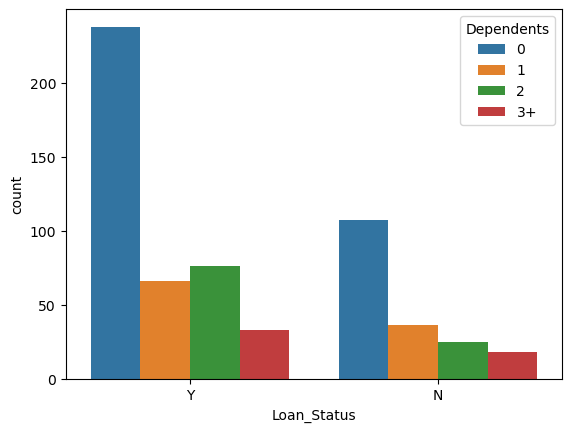

In [15]:
sns.countplot(x='Loan_Status',data=train_df,hue='Dependents')
plt.show()

It seems that applicants with no dependents are more likely to get their loans approved.

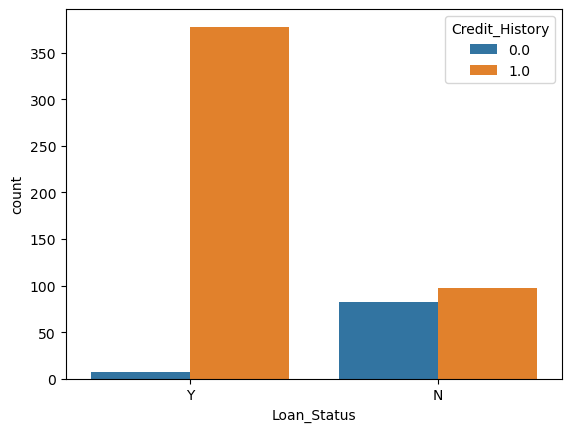

In [16]:
sns.countplot(x='Loan_Status',data=train_df,hue='Credit_History')
plt.show()

We can see that a larger number of applicants with a credit history of 1 got their loans approved.

# Preprocessing the train dataset

# Data imputation

In [17]:
#Finding the number of null values in each column
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in 'Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term' and 'Credit_History'.

In [18]:
#Data imputation using mode
train_df['Gender']=train_df['Gender'].fillna(train_df['Gender'].mode()[0])
train_df['Married']=train_df['Married'].fillna(train_df['Married'].mode()[0])
train_df['Dependents']=train_df['Dependents'].fillna(train_df['Dependents'].mode()[0])
train_df['Self_Employed']=train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0])
train_df['Credit_History']=train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0])
train_df['Loan_Amount_Term']=train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0])

In [19]:
#Filling the numerical variable 'LoanAmount' using median
train_df['LoanAmount']=train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())

In [20]:
#Checking whether all the missing values are filled
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now,there are no missing values.

# Encoding

In [21]:
#Label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_df['Gender']=le.fit_transform(train_df['Gender'])
train_df['Married']=le.fit_transform(train_df['Married'])
train_df['Education']=le.fit_transform(train_df['Education'])
train_df['Dependents']=le.fit_transform(train_df['Dependents'])
train_df['Self_Employed']=le.fit_transform(train_df['Self_Employed'])
train_df['Property_Area']=le.fit_transform(train_df['Property_Area'])
train_df['Loan_Status']=le.fit_transform(train_df['Loan_Status'])

train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Checking correlation

<Axes: >

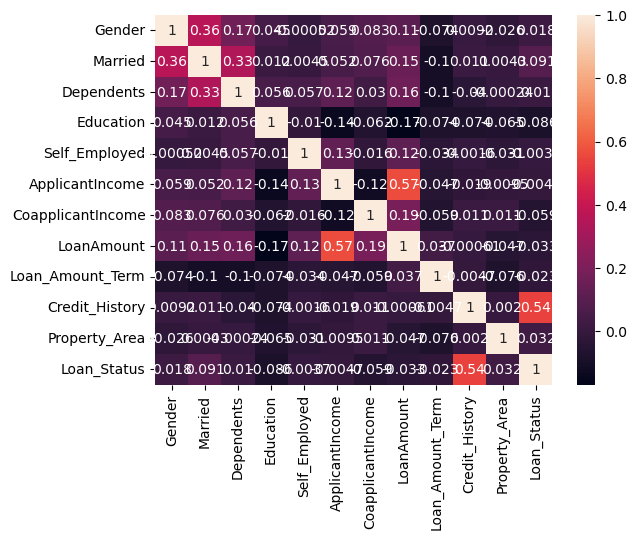

In [22]:
#Correlation heatmap
sns.heatmap(train_df.corr(),annot=True)

# Loading the test file

In [23]:
test_df=pd.read_csv(r"C:\Users\jenan\Downloads\test_lAUu6dG.csv")

# Exploratory Data Analysis on test dataset

In [24]:
#To display the first 5 rows of the dataset
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [25]:
#To find the number of rows and columns in the dataset
test_df.shape

(367, 12)

In [26]:
#To find the column names
test_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [27]:
#To get informations such as number of columns,column names,number of non-null cells in each column,datatype of each column
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [28]:
#To get statistical summary of numerical columns
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


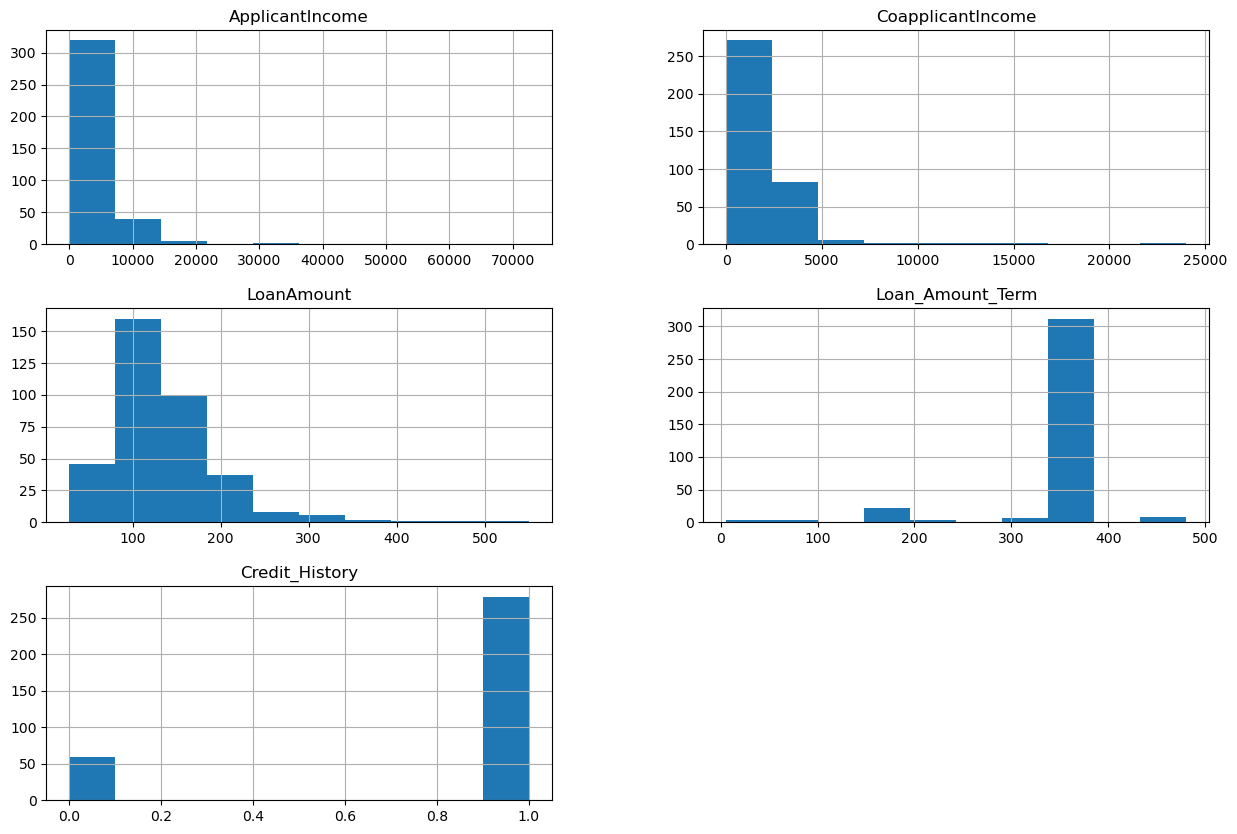

In [29]:
#Plotting histogram to analyse the distribution of numerical features
test_df.hist(figsize = (15,10))
plt.show()

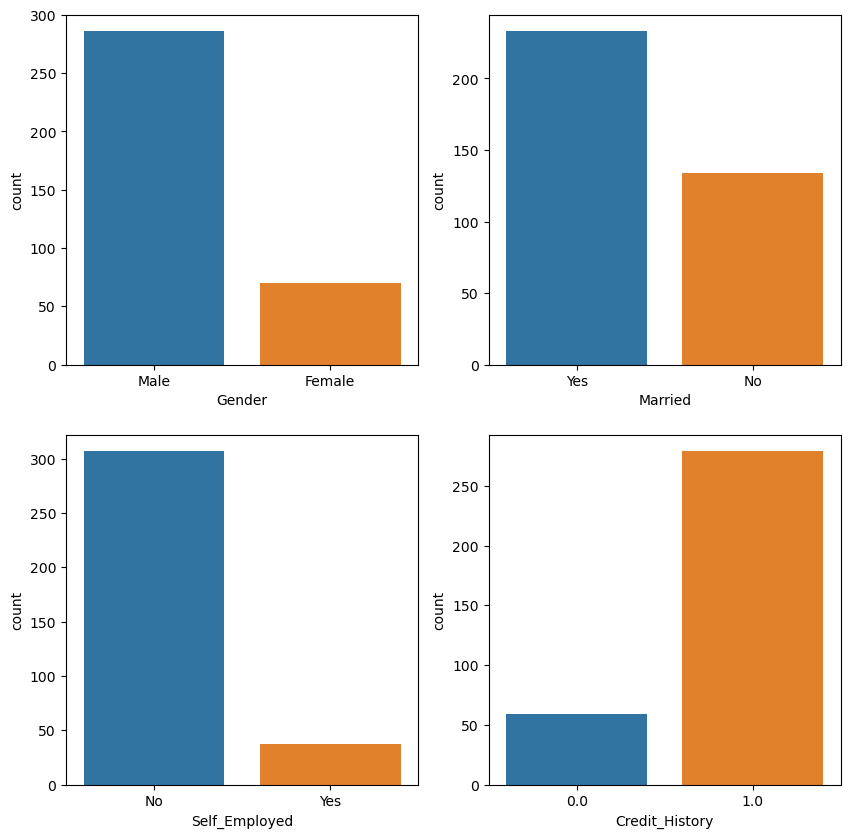

In [30]:
#Visualizing the categorical features
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.countplot(x='Gender',data=test_df)
plt.subplot(222)
sns.countplot(x='Married',data=test_df)
plt.subplot(223)
sns.countplot(x='Self_Employed',data=test_df)
plt.subplot(224)
sns.countplot(x='Credit_History',data=test_df)
plt.show()

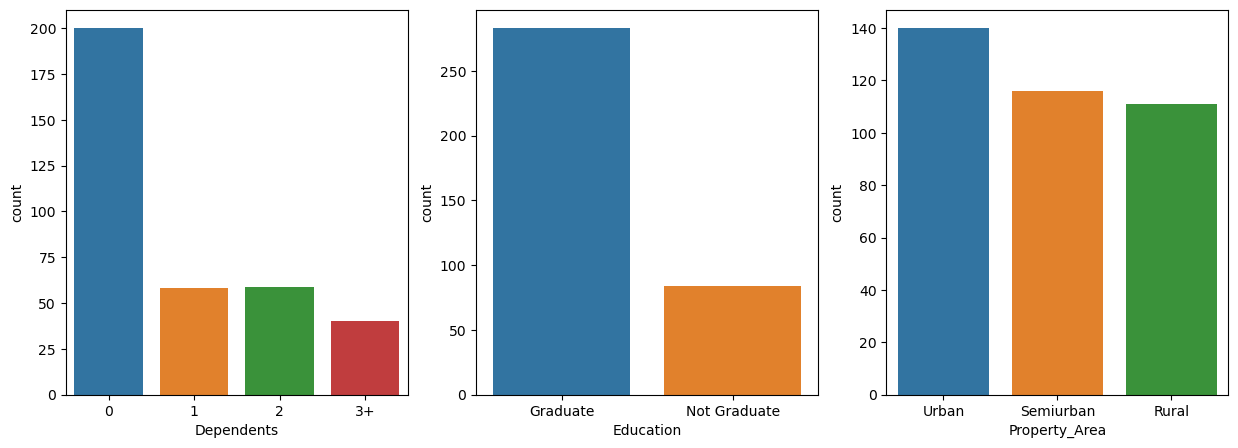

In [31]:
#Visualizing the ordinal variables
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(x='Dependents',data=test_df)
plt.subplot(132)
sns.countplot(x='Education',data=test_df)
plt.subplot(133)
sns.countplot(x='Property_Area',data=test_df)
plt.show()

# Preprocessing the test dataset

# Data imputation

In [32]:
#Finding the number of null values in each column
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

There are missing values in 'Gender','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term' and 'Credit_History'.

In [33]:
#Data imputation using mode
test_df['Gender']=test_df['Gender'].fillna(test_df['Gender'].mode()[0])
test_df['Dependents']=test_df['Dependents'].fillna(test_df['Dependents'].mode()[0])
test_df['Self_Employed']=test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0])
test_df['Loan_Amount_Term']=test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0])
test_df['Credit_History']=test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0])

In [34]:
#Filling the numerical variable 'LoanAmount' using median
test_df['LoanAmount']=test_df['LoanAmount'].fillna(test_df['LoanAmount'].median())

In [35]:
#Checking whether all the missing values are filled
test_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Encoding

In [36]:
#Label encoding categorical columns
test_df['Gender']=le.fit_transform(test_df['Gender'])
test_df['Married']=le.fit_transform(test_df['Married'])
test_df['Education']=le.fit_transform(test_df['Education'])
test_df['Dependents']=le.fit_transform(test_df['Dependents'])
test_df['Self_Employed']=le.fit_transform(test_df['Self_Employed'])
test_df['Property_Area']=le.fit_transform(test_df['Property_Area'])

In [37]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


# Defining the dependent and independent variables

In [38]:
x=train_df.drop(['Loan_ID','Loan_Status'],axis=1)
y=train_df['Loan_Status']

# Scaling

In [39]:
#Doing standard scaling on the feature set
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x=std_scaler.fit_transform(x)
x=pd.DataFrame(x)

# Splitting the train dataset

In [40]:
#Splitting the data in such a way that 80% data is for training and 20% is for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

# LOGISTIC REGRESSION

# Model Training

In [41]:
#Defining and training(fitting) the logistic regression model
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr_model=lr.fit(x_train,y_train)

In [42]:
#Making predictions using the fitted model
lr_pred=lr_model.predict(x_test)

# Model Evaluation

In [43]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,lr_pred))

Confusion matrix : 
 [[18 25]
 [ 1 79]]


In [44]:
#Evaluating the model using the metric accuracy score
lr_acc=accuracy_score(y_test,lr_pred)
print("Accuracy score :",lr_acc)
print(f"Accuracy : {lr_acc*100:.2f}%")

Accuracy score : 0.7886178861788617
Accuracy : 78.86%


# Making predictions for the test dataset

In [45]:
test=test_df.drop('Loan_ID',axis=1)

In [46]:
#Scaling the test data
test_scaled=std_scaler.fit_transform(test)
test_scaled=pd.DataFrame(test_scaled)

In [47]:
lr_prediction=lr_model.predict(test_scaled)
lr_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Loading the sample submission file

In [48]:
submission=pd.read_csv(r"C:\Users\jenan\Downloads\sample_submission_49d68Cx.csv")

# Replacing the 'Loan_Status' column with the prediction values

In [49]:
submission['Loan_Status']=lr_prediction
submission['Loan_ID']=test_df['Loan_ID']
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [50]:
#Converting the prediction values 0 and 1 to 'N' and 'Y' respectively
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Converting the submission file to .csv format

In [51]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv("C:\\Users\jenan\\Downloads\\Loan_pred_Logistic.csv",index=False)

# K-NEAREST NEIGHBORS

In [52]:
from sklearn.neighbors import KNeighborsClassifier

#To choose the best value for K by finding the accuracy scores of the model for K values ranging from 3 to 14
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)
print("Accuracy scores for K values ranging from 3 to 14 : \n",metric_k)

Accuracy scores for K values ranging from 3 to 14 : 
 [0.7479674796747967, 0.6747967479674797, 0.7560975609756098, 0.7235772357723578, 0.7723577235772358, 0.7560975609756098, 0.7967479674796748, 0.7886178861788617, 0.7967479674796748, 0.7967479674796748, 0.7886178861788617, 0.7886178861788617]


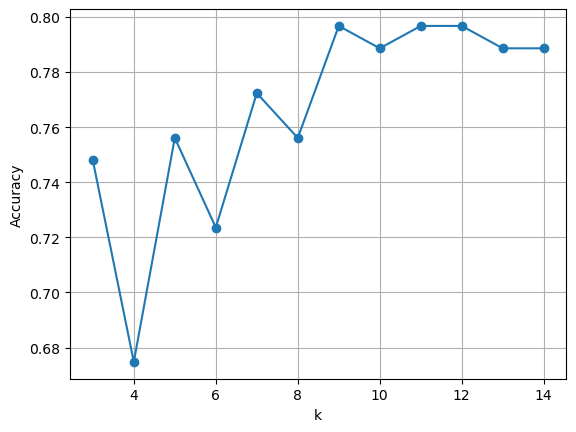

In [53]:
#Plotting the accuracy scores to find the best K value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel("Accuracy")
plt.grid()

K values 9,11, and 12 has the highest accuracy.So we choose k to be 9.

# Model Training

In [54]:
#Defining and training(fitting) the KNN model with K=9
classifier=KNeighborsClassifier(n_neighbors=9,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [55]:
#Making predictions using the fitted model
y_pred=classifier.predict(x_test)

# Model Evaluation

In [56]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))

Confusion matrix : 
 [[18 25]
 [ 0 80]]


In [57]:
#Evaluating the model using the metric accuracy score
knn_acc=accuracy_score(y_test,y_pred)
print("Accuracy score :",knn_acc)
print(f"Accuracy : {knn_acc*100:.2f}%")

Accuracy score : 0.7967479674796748
Accuracy : 79.67%


# Making predictions for the test dataset

In [58]:
knn_prediction=classifier.predict(test_scaled)
knn_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Loading the sample submission file


In [59]:
submission=pd.read_csv(r"C:\Users\jenan\Downloads\sample_submission_49d68Cx.csv")

# Replacing the 'Loan_Status' column with the prediction values

In [60]:
submission['Loan_Status']=knn_prediction
submission['Loan_ID']=test_df['Loan_ID']
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [61]:
#Converting prediction values 0 and 1 to 'N' and 'Y' respectively
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Converting the submission file to .csv format

In [62]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv("C:\\Users\jenan\\Downloads\\Loan_pred_KNN.csv",index=False)

# SUPPORT VECTOR MACHINE

# Model Training

In [63]:
#Defining and training(fitting) the SVM model with radial basis function kernel
from sklearn.svm import SVC
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred_svm1=svm_cls1.predict(x_test)

In [64]:
#Making predictions using the fitted model
y_pred_svm1=svm_cls1.predict(x_test)

# Model Evaluation

In [65]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_svm1))

Confusion matrix : 
 [[18 25]
 [ 1 79]]


In [66]:
#Evaluating the model using the metric accuracy score
svm1_acc=accuracy_score(y_test,y_pred_svm1)
print("Accuracy score :",svm1_acc)
print(f"Accuracy : {svm1_acc*100:.2f}%")


Accuracy score : 0.7886178861788617
Accuracy : 78.86%


# Making predictions for the test dataset

In [67]:
svm1_prediction=svm_cls1.predict(test_scaled)
svm1_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Loading the sample submission file

In [68]:
submission=pd.read_csv(r"C:\Users\jenan\Downloads\sample_submission_49d68Cx.csv")

# Replacing the 'Loan_Status' column with the prediction values

In [69]:
submission['Loan_Status']=svm1_prediction
submission['Loan_ID']=test_df['Loan_ID']
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [70]:
#Converting the prediction values 0 and 1 to 'N' and 'Y' respectively
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Converting the submission file to .csv format

In [71]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv("C:\\Users\jenan\\Downloads\\Loan_pred_SVM.csv",index=False)

# DECISION TREE

# Model Training

In [72]:
#Defining and training(fitting) the decion tree model
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_model=dt_cls.fit(x_train,y_train)

In [73]:
#Making predictions using the fitted model
y_pred_dt=dt_model.predict(x_test)

# Model Evaluation

In [74]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_dt))

Confusion matrix : 
 [[22 21]
 [18 62]]


In [75]:
#Evaluating the model using the metric accuracy score
dt_acc=accuracy_score(y_test,y_pred_dt)
print("Accuracy score :",dt_acc)
print(f"Accuracy : {dt_acc*100:.2f}%")

Accuracy score : 0.6829268292682927
Accuracy : 68.29%


# Making predictions for the test dataset

In [76]:
dt_prediction=dt_model.predict(test_scaled)
dt_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,

# Loading the sample submission file

In [77]:
submission=pd.read_csv(r"C:\Users\jenan\Downloads\sample_submission_49d68Cx.csv")

# Replacing the 'Loan_Status' column with the prediction values

In [78]:
submission['Loan_Status']=dt_prediction
submission['Loan_ID']=test_df['Loan_ID']
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [79]:
#Converting the prediction values 0 and 1 to 'N' and 'Y' respectively
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Converting the submission file to .csv format

In [80]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv("C:\\Users\jenan\\Downloads\\Loan_pred_dt.csv",index=False)

# RANDOM FOREST

# Model Training

In [81]:
#Defining and training(fitting) the random forest model
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(x_train,y_train)

In [82]:
#Making predictions using the fitted model
y_pred_rf=model_rf.predict(x_test)

# Model Evaluation

In [83]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_rf))

Confusion matrix : 
 [[18 25]
 [ 4 76]]


In [84]:
#Evaluating the model using the metric accuracy score
rf_acc=accuracy_score(y_test,y_pred_rf)
print("Accuracy score :",rf_acc)
print(f"Accuracy : {rf_acc*100:.2f}%")

Accuracy score : 0.7642276422764228
Accuracy : 76.42%


# Making predictions for the test dataset

In [85]:
rf_prediction=model_rf.predict(test_scaled)
rf_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

# Loading the sample submission file

In [86]:
submission=pd.read_csv(r"C:\Users\jenan\Downloads\sample_submission_49d68Cx.csv")

# Replacing the 'Loan_Status' column with the prediction values

In [87]:
submission['Loan_Status']=rf_prediction
submission['Loan_ID']=test_df['Loan_ID']
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [88]:
#Converting the prediction values 0 and 1 to 'N' and 'Y' respectively
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Converting the submission file to .csv format

In [89]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv("C:\\Users\jenan\\Downloads\\Loan_pred_RF.csv",index=False)